In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 데이터 로드
df = pd.read_csv('winequality-red.csv')

In [2]:
features = df.drop('quality', axis=1)  # quality 제외
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters  # 클러스터 결과를 데이터프레임에 추가

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.28173931 0.1750827 ]


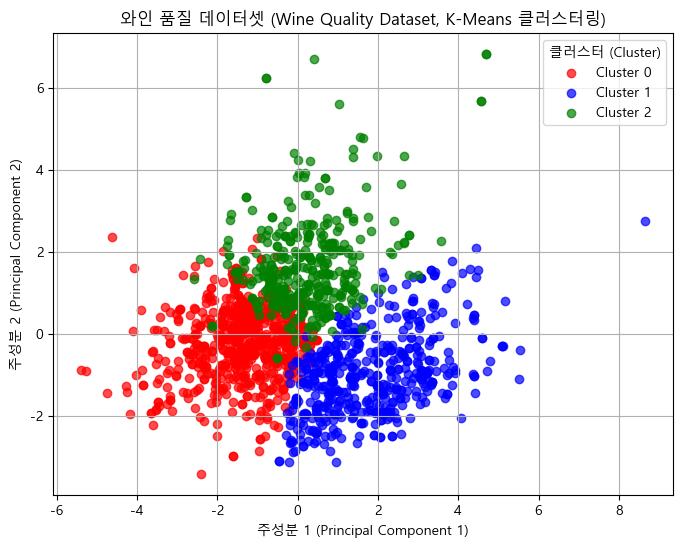

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for cluster in range(3):
    plt.scatter(X_pca[df['cluster'] == cluster, 0],
                X_pca[df['cluster'] == cluster, 1],
                color=colors[cluster],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지
plt.title('와인 품질 데이터셋 (Wine Quality Dataset, K-Means 클러스터링)')
plt.xlabel('주성분 1 (Principal Component 1)')
plt.ylabel('주성분 2 (Principal Component 2)')
plt.legend(title='클러스터 (Cluster)')
plt.grid()
plt.show()

In [8]:
print("\n클러스터별 평균 품질 점수:")
print(df.groupby('cluster')['quality'].mean())


클러스터별 평균 품질 점수:
cluster
0    5.552632
1    5.960159
2    5.362667
Name: quality, dtype: float64
